In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import sys
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')


In [222]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

In [223]:
def get_frequences_from_signal(file_path, mh_var, display_graph):
    
    count_cycle = 0
    temp_tab = []
    temp_tab_df =[]
    bornes_period = []
    mh_var_return = mh_var
    df = pd.read_csv(file_path, nrows=150)
    df = pd.DataFrame(df)

    # get all min local in L1(2)
    min_local = df['L1(2)'].diff().lt(0) & df['L1(2)'].diff().shift(1).gt(0)
    #hide message warning

    tab_df = df['L1(2)'][min_local].values

    for i in range(len(tab_df)):    
        if tab_df[i] < 0:
            temp_tab_df.append(tab_df[i])
            temp_tab.append(0)
        else:
            temp_tab_df.append(tab_df[i])
            temp_tab.append(1)
        if temp_tab[i] < 0:
            if temp_tab[i-1] > 0:
                count_cycle += 1
        if temp_tab[i] > 0:
            if temp_tab[i-1] == 0:
                count_cycle += 1
        if count_cycle == 2:
            break

    #get max of temb_tab_df
    max_temp_tab_df = max(temp_tab_df)
    #remove this max 
    temp_tab_df.remove(max_temp_tab_df)
    bornes_period.append(max_temp_tab_df)
    max_temp_tab_df_2 = max(temp_tab_df)
    bornes_period.append(max_temp_tab_df_2)


    #get time of max
    time_max = df['TIME'][df['L1(2)'] == max_temp_tab_df].values
    time_max_2 = df['TIME'][df['L1(2)'] == max_temp_tab_df_2].values
    
    period = abs(time_max - time_max_2)
    
    frequency = 1/period
    
    if display_graph:
        
        
        df.plot(x='TIME', y='L1(2)', kind='line')
        #plot line in 0 y
        plt.axhline(y=0, color='r', linestyle='-')
        #plot time max
        plt.axvline(x=time_max, color='g', linestyle='-')
        plt.axvline(x=time_max_2, color='g', linestyle='-')

        plt.plot(df['TIME'][min_local], df['L1(2)'][min_local], 'ro')
        plt.title(str(mh_var_return) + 'mH' + ' - ' + str(frequency[0]) + 'Hz')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.show()
        
    return frequency, mh_var_return



# Steps of functions above

- Load csv file path with data signal(Tension(V) in fonction of time(s)).

- With the signal, we have to calculate the frequency of it

    - To get the frequency, we have to calculate the period of the signal

        - To calculate period, we need to find the minimum local of one cycle, and also the minimum local of the next cycle

        - With the two minimum local, we can calculate the period by soustracting the two minimum local in fonction of time

    - With the period, we can calculate the frequency by dividing 1 by the period
    
- Display the frequency in a graph

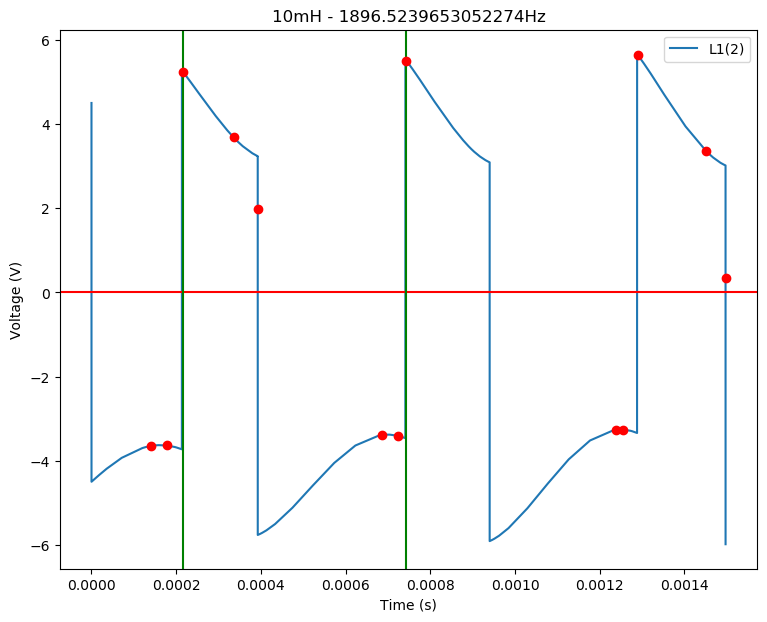

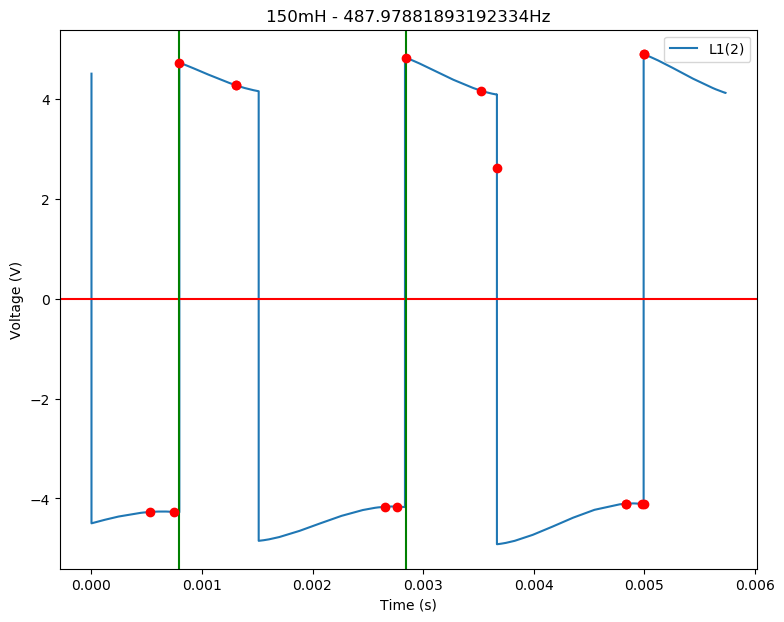

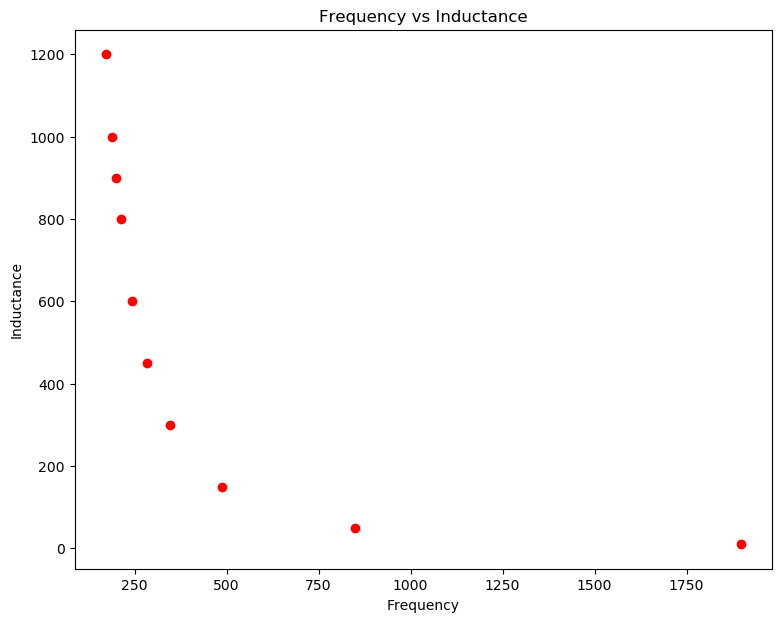

,Frequency,Inductance
0,1896.52,10.00
1,345.84,300.00
2,283.24,450.00
3,243.95,600.00
4,173.74,1200.00
5,487.98,150.00
6,211.91,800.00
7,200.19,900.00
8,189.95,1000.00
9,847.79,50.00


In [224]:
frequency_tab = []
mh_var_tab = []


frequency,mh_var = get_frequences_from_signal('./file_data/10mH.DAT', 10,True)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/300mH.DAT',300,False)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/450.DAT', 450,False)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/600mH.DAT', 600,False)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/1200.DAT',1200,False)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/graph1.DAT',150,True)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/800.DAT',800,False)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/900.DAT',900,False)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/1000.DAT',1000,False)
frequency_tab.append(frequency)
mh_var_tab.append(mh_var)

frequency,mh_var = get_frequences_from_signal('./file_data/50.DAT',50,False)
frequency_tab.append(frequency)
mh_var_tab.append(int(mh_var))

#convert data in the list as int 
frequency_tab_float = [float(i) for i in frequency_tab]
mh_var_tab_float = [float(i) for i in mh_var_tab]

#make a df with frequency and mh_var
df_first = pd.DataFrame({'Frequency':frequency_tab_float, 'Inductance':mh_var_tab_float})

#plot graph
plt.plot(frequency_tab, mh_var_tab,'ro')
plt.title('Frequency vs Inductance')
plt.xlabel('Frequency')
plt.ylabel('Inductance')

plt.show()
df_first




# Resampling of dataset + noise addition

In [225]:
from sklearn.utils import resample

# Set random seed for reproducibility
np.random.seed(44)

# Create a function to add noise
def add_noise(data, noise_level=0.9):
    noise = np.random.normal(scale=noise_level, size=data.shape)
    return data + noise

# Resample the dataframe with noise
resampled_data = resample(df_first, replace=True, n_samples=1000)
noisy_data = add_noise(resampled_data)

# Reset the index of the resampled and noisy datasets
resampled_data = resampled_data.reset_index(drop=True)
noisy_data = noisy_data.reset_index(drop=True)

# Print the resampled and noisy datasets
print(resampled_data)
print(noisy_data)


     Frequency  Inductance
0       173.74     1200.00
1       243.95      600.00
2       345.84      300.00
3       243.95      600.00
4      1896.52       10.00
..         ...         ...
995     173.74     1200.00
996     173.74     1200.00
997     211.91      800.00
998     345.84      300.00
999     189.95     1000.00

[1000 rows x 2 columns]
     Frequency  Inductance
0       173.74     1198.99
1       244.20      600.26
2       346.57      299.81
3       244.55      599.71
4      1896.78        9.28
..         ...         ...
995     175.26     1199.09
996     174.39     1199.72
997     211.43      800.79
998     344.67      299.90
999     190.92     1000.68

[1000 rows x 2 columns]


# Distribution of data before and after resampling


10


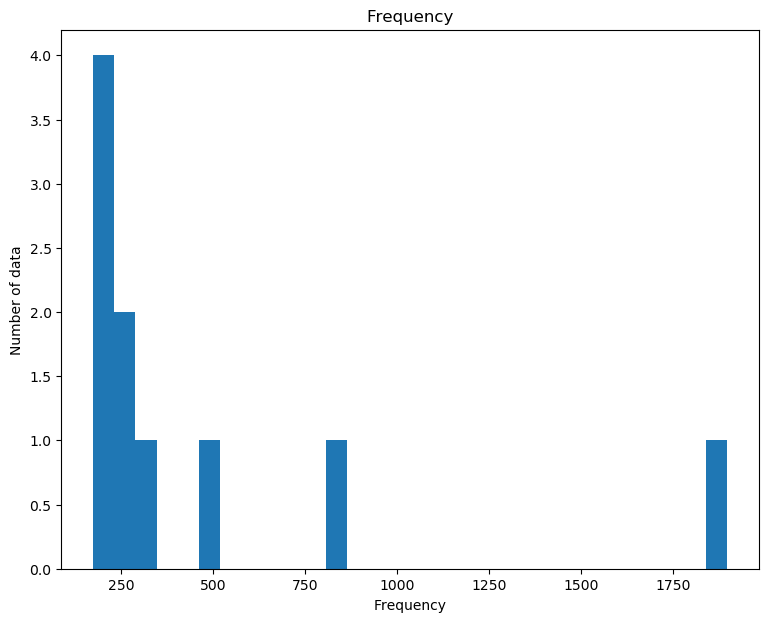

In [226]:
df_first.head(10)
print(len(df_first))

#plot data in shape of histogram
plt.hist(df_first['Frequency'], bins=30)
plt.title('Frequency')
plt.xlabel('Frequency')
plt.ylabel('Number of data')
plt.show()


1000


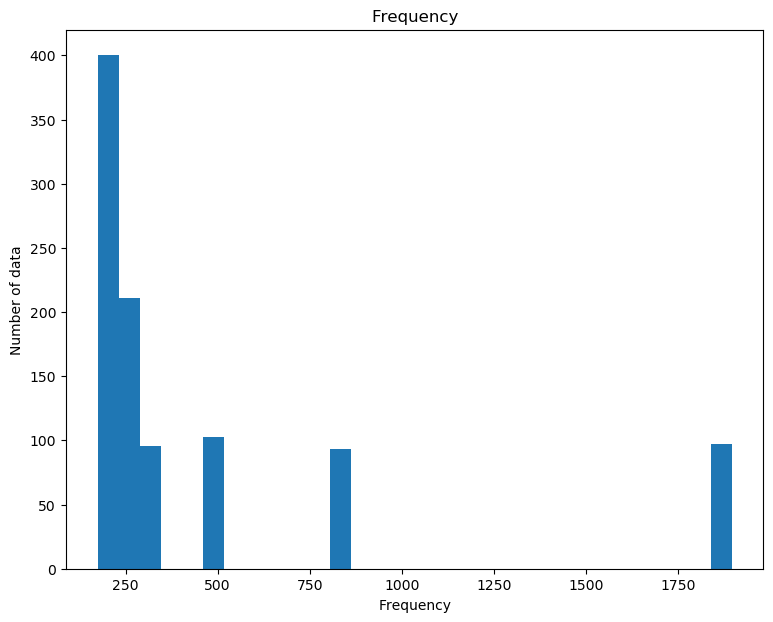

In [227]:
resampled_data.head(10)
print(len(resampled_data))

#plot data in shape of histogram
plt.hist(resampled_data['Frequency'], bins=30)
plt.title('Frequency')
plt.xlabel('Frequency')
plt.ylabel('Number of data')
plt.show()

# Distribution of original, resampled and noisy dataset

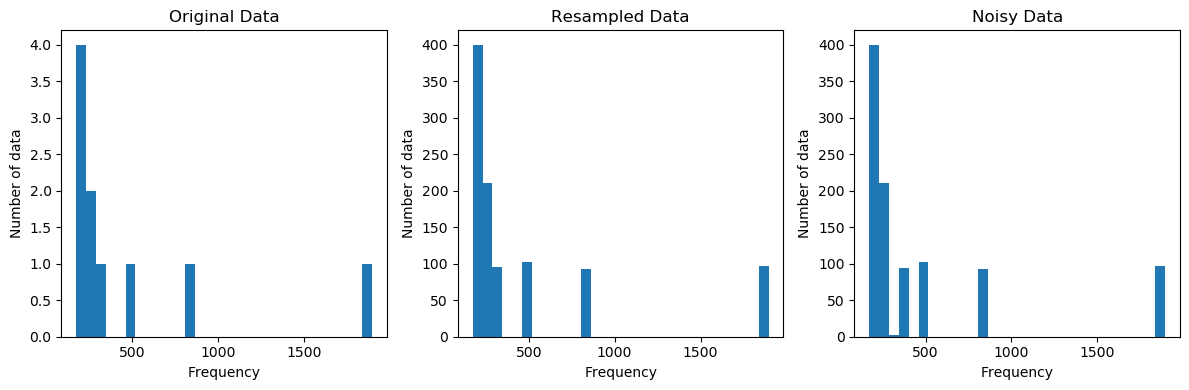

In [228]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first histogram
axs[0].hist(df_first['Frequency'], bins=30)
axs[0].set_title('Original Data')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Number of data')

# Plot the second histogram
axs[1].hist(resampled_data['Frequency'], bins=30)
axs[1].set_title('Resampled Data')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Number of data')

# Plot the third histogram
axs[2].hist(noisy_data['Frequency'], bins=30)
axs[2].set_title('Noisy Data')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Number of data')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Distribution of original, resampled and noisy dataset. Showing with density tools

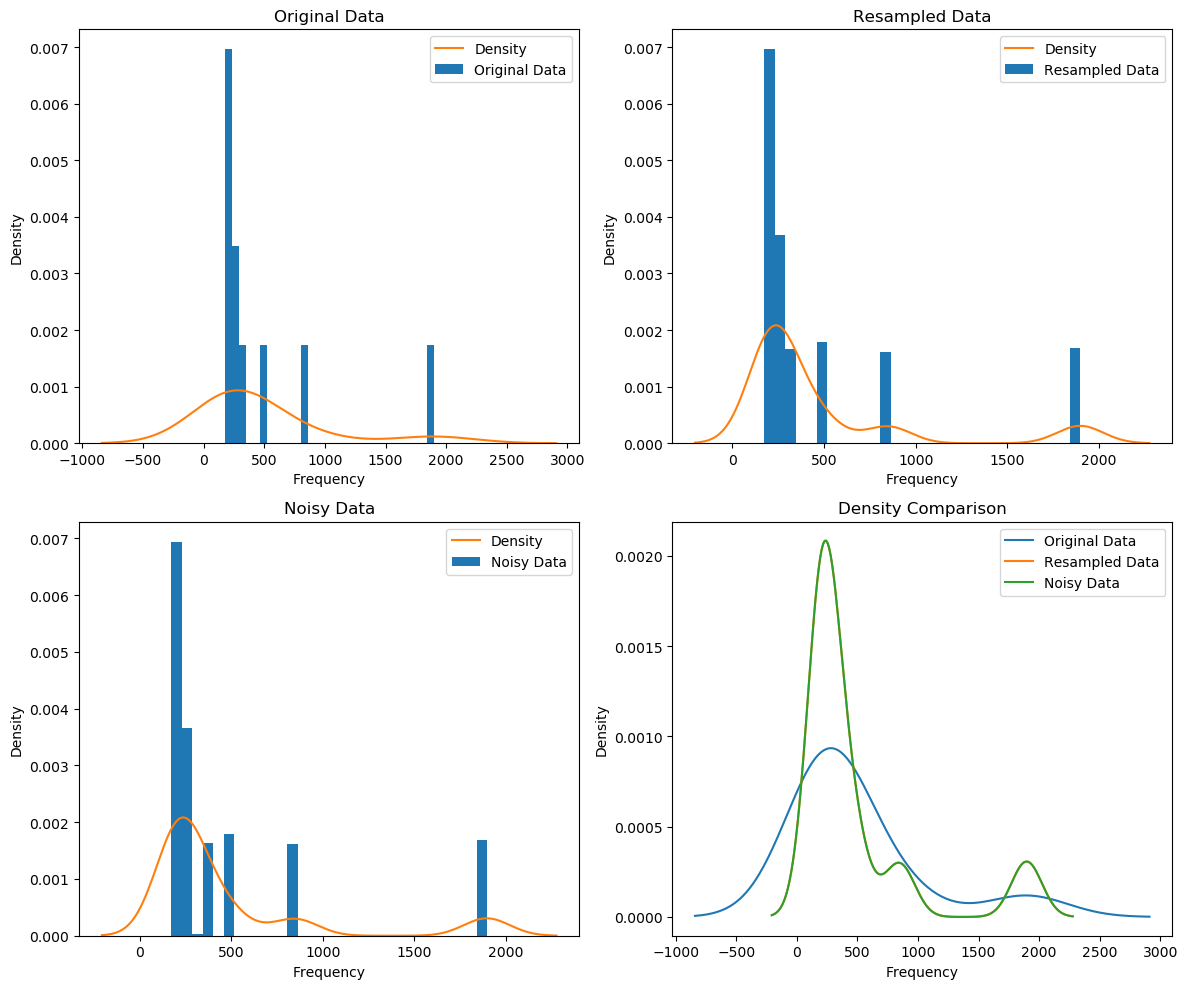

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the histograms and density curves
axs[0, 0].hist(df_first['Frequency'], bins=30, density=True, label='Original Data')
sns.kdeplot(df_first['Frequency'], label='Density', ax=axs[0, 0])
axs[0, 0].set_title('Original Data')
axs[0, 0].set_xlabel('Frequency')
axs[0, 0].set_ylabel('Density')
axs[0, 0].legend()

axs[0, 1].hist(resampled_data['Frequency'], bins=30, density=True, label='Resampled Data')
sns.kdeplot(resampled_data['Frequency'], label='Density', ax=axs[0, 1])
axs[0, 1].set_title('Resampled Data')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Density')
axs[0, 1].legend()

axs[1, 0].hist(noisy_data['Frequency'], bins=30, density=True, label='Noisy Data')
sns.kdeplot(noisy_data['Frequency'], label='Density', ax=axs[1, 0])
axs[1, 0].set_title('Noisy Data')
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('Density')
axs[1, 0].legend()

# Plot the density comparison
sns.kdeplot(df_first['Frequency'], label='Original Data', ax=axs[1, 1])
sns.kdeplot(resampled_data['Frequency'], label='Resampled Data', ax=axs[1, 1])
sns.kdeplot(noisy_data['Frequency'], label='Noisy Data', ax=axs[1, 1])

axs[1, 1].set_title('Density Comparison')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Density')

#put legend of color in the graph
axs[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()


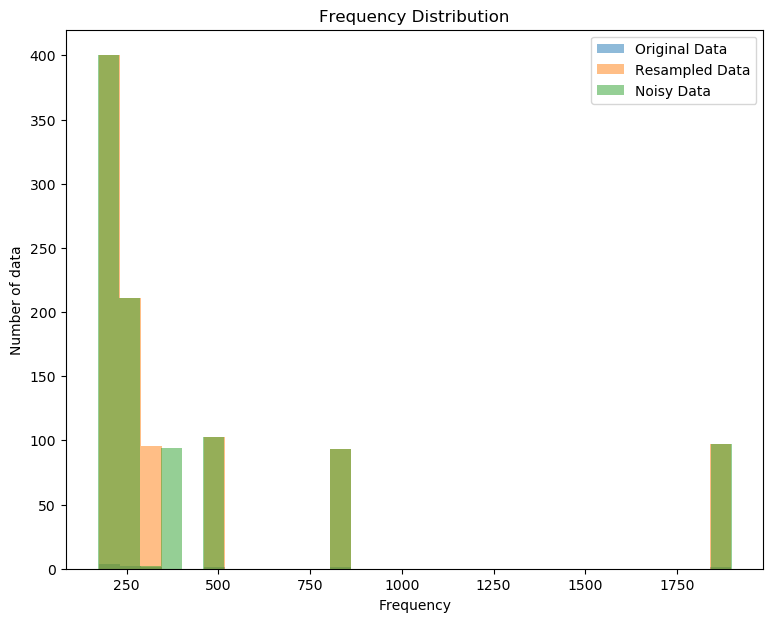

In [230]:
# Plot side-by-side histograms for the three datasets
plt.hist(df_first['Frequency'], bins=30, alpha=0.5, label='Original Data')
plt.hist(resampled_data['Frequency'], bins=30, alpha=0.5, label='Resampled Data')
plt.hist(noisy_data['Frequency'], bins=30, alpha=0.5, label='Noisy Data')

plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of data')
plt.legend()
plt.show()


# Other way to show the distribution of original, resampled and noisy dataset.

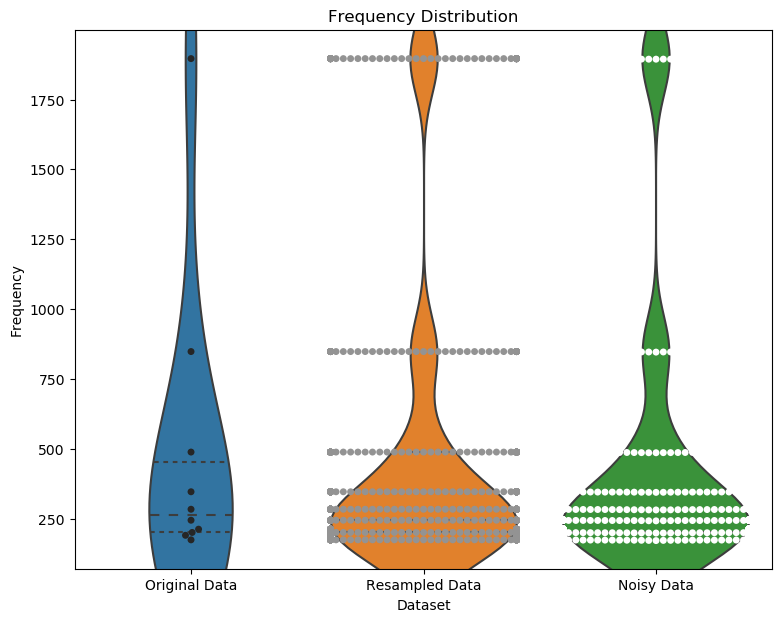

In [232]:
# Combine the three datasets into a single dataframe
combined_data = pd.concat([df_first['Frequency'], resampled_data['Frequency'], noisy_data['Frequency']], axis=1)
combined_data.columns = ['Original Data', 'Resampled Data', 'Noisy Data']

# Plot a violin plot with a swarm plot overlay
sns.violinplot(data=combined_data, inner="quartile")
sns.swarmplot(data=combined_data, color='white', edgecolor='black')

plt.title('Frequency Distribution')
plt.xlabel('Dataset')
plt.ylabel('Frequency')
plt.show()


# Prediction algorithm in Metal detector simulation case

By using a simulation software, and after modelization of the metal detector, we can get the signal of the metal detector in fonction of time. We can use the algorithm above to get the frequency of the signal, and then we can predict a particular important aspect for recognize a specific metal : inductance.

Here is so 3 algorithms to predict the inductance of a metal :
- Linear regression
- Polynomial regression
- Random forest regression


Mean squared error of polynomial regression: 6263.87
Variance score of polynomial regression: 0.96

Mean squared error of linear regression: 82202.35
Coefficient of determination of linear regression: 0.48


Mean squared error of random_forest: 3602.00
Variance score of random_forest: 0.95


Mean squared error of svm: 151003.65
Variance score of svm: -1.00


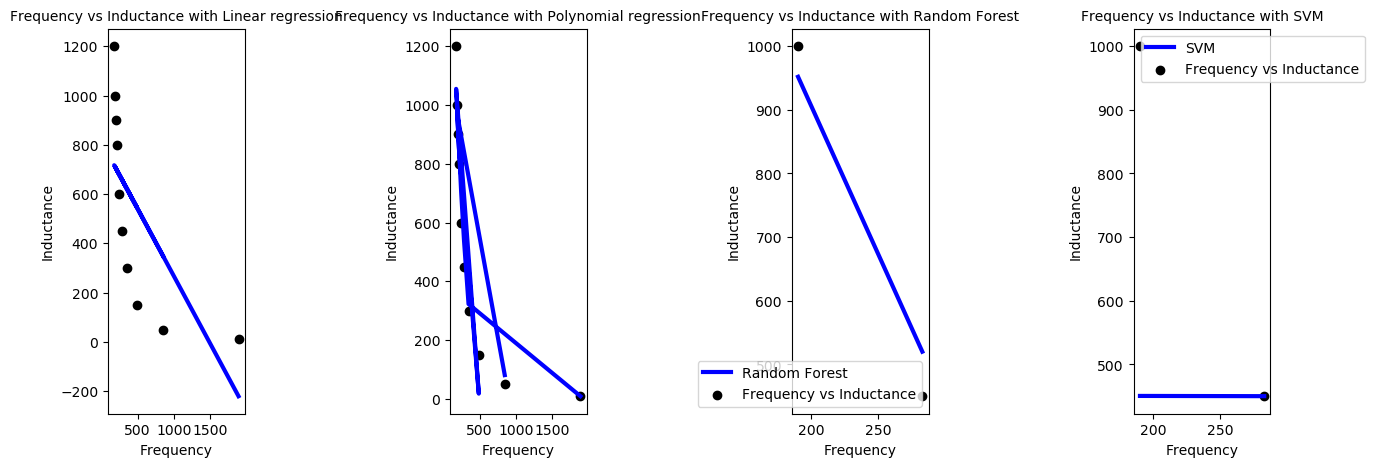

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import sklearn.mixture
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

#make a df with frequency and mh_var
df = pd.DataFrame({'Frequency':frequency_tab, 'Inductance':mh_var_tab})


def linear_regression_frequency_mah(frequency_tab, mh_var_tab):
        try :
                #reshape data
                frequency_tab = np.array(frequency_tab).reshape(-1,1)
                mh_var_tab = np.array(mh_var_tab).reshape(-1,1)
        except :
                print('error')
                pass
        # Create linear regression object
        regr = LinearRegression()

        # Train the model using the training sets
        regr.fit(frequency_tab, mh_var_tab)

        # Make predictions using the testing set
        mh_var_pred = regr.predict(frequency_tab)
        # The mean squared error
        print('\n'+'Mean squared error of linear regression: %.2f'
                % mean_squared_error(mh_var_tab, mh_var_pred))
                
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination of linear regression: %.2f'
                % r2_score(mh_var_tab, mh_var_pred))

        return mh_var_pred


def polynomial_regression(frequency_tab, mh_var_tab):
        
        model = make_pipeline(PolynomialFeatures(3), LinearRegression())
        model.fit(frequency_tab, mh_var_tab)
        mh_var_pred = model.predict(frequency_tab)
        # The mean squared error
        print('\n'+"Mean squared error of polynomial regression: %.2f"
                % mean_squared_error(mh_var_tab, mh_var_pred))
        # Explained variance score: 1 is perfect prediction
        print('Variance score of polynomial regression: %.2f' % r2_score(mh_var_tab, mh_var_pred))
        # Plot outputs
        #reshape frequency
        frequency_tab = np.array(frequency_tab).reshape(-1,1)

        return mh_var_pred

def predict_induct_by_using_random_forest(df,frequency_val=1000):
        #split data
        X = df[['Frequency']]
        y = df['Inductance']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        #train model
        regressor = RandomForestRegressor(n_estimators=100, random_state=0)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        #predict inductance
        inductance = regressor.predict([[frequency_val]])
        #mean squared error
        print("\n")
        print("Mean squared error of random_forest: %.2f"
                % mean_squared_error(y_test, y_pred))
        # Explained variance score: 1 is perfect prediction 
        print('Variance score of random_forest: %.2f' % r2_score(y_test, y_pred))

        #plot graph with different between real and predicted value
        X_test = np.array(X_test).reshape(-1,1)
        y_test = np.array(y_test).reshape(-1,1)
        return inductance, X_test, y_test, y_pred

def predict_induct_by_using_svm(df,frequency_val=1000):
        #split data
        X = df[['Frequency']]
        y = df['Inductance']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        #train model
        regressor = svm.SVR()
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        #predict inductance
        inductance = regressor.predict([[frequency_val]])
        #mean squared error
        print("\n")
        print("Mean squared error of svm: %.2f"
                % mean_squared_error(y_test, y_pred))
        # Explained variance score: 1 is perfect prediction 
        print('Variance score of svm: %.2f' % r2_score(y_test, y_pred))

        #plot graph with different between real and predicted value
        X_test = np.array(X_test).reshape(-1,1)
        y_test = np.array(y_test).reshape(-1,1)
        return inductance, X_test, y_test, y_pred




mh_var_pred_poly = polynomial_regression(frequency_tab, mh_var_tab)
mh_var_pred_linear = linear_regression_frequency_mah(frequency_tab, mh_var_tab)
inductance, X_test, y_test, y_pred = predict_induct_by_using_random_forest(df)
inductance_svm, X_test_svm, y_test_svm, y_pred_svm = predict_induct_by_using_svm(df)

#3 graphs in one figure
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))


ax1.scatter(frequency_tab, mh_var_tab,  color='black')
ax1.plot(frequency_tab, mh_var_pred_linear, color='blue', linewidth=3)
ax1.set_title('Frequency vs Inductance with Linear regression',fontdict={'fontsize': 10})
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Inductance')

#space between graphs
fig.subplots_adjust(wspace=1.5)

ax2.scatter(frequency_tab, mh_var_tab,  color='black')
ax2.plot(frequency_tab, mh_var_pred_poly, color='blue', linewidth=3)
ax2.set_title('Frequency vs Inductance with Polynomial regression',fontdict={'fontsize': 10})
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Inductance')

ax3.scatter(X_test, y_test,  color='black')
ax3.plot(X_test, y_pred, color='blue', linewidth=3)
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Inductance')
ax3.set_title('Frequency vs Inductance with Random Forest',fontdict={'fontsize': 10})
ax3.legend(['Random Forest', 'Frequency vs Inductance', 'Predicted value'])

ax4.scatter(X_test_svm, y_test_svm,  color='black')
ax4.plot(X_test_svm, y_pred_svm, color='blue', linewidth=3)
ax4.set_xlabel('Frequency')
ax4.set_ylabel('Inductance')
ax4.set_title('Frequency vs Inductance with SVM',fontdict={'fontsize': 10})
ax4.legend(['SVM', 'Frequency vs Inductance', 'Predicted value'])



plt.show()




# Results

We have so a dataset composed by 10 elements. That's a first step inside the project, There is not a lot of data, and we can't predict a lot of things.
</br>
</br>
In a little dataset, The polynomial regression algorithm is the best algorithm to predict the inductance of a metal thanks to his accuracy.
But we have to see with a bigger dataset which is the best one and also, wich is the best algorithm to predict the inductance, and so maybe the metal of a signal.

# Next step

- Get a bigger dataset

    ## Generation of permeability

    - New aspect is the permeability. The permeability is a physical parameter who define a specific metal category. There is 4 metallic categories:
        
            - Ferromagnetic
            - Paramagnetic
            - Diamagnetic
            - Non-magnetic
        
    - Coefficients of permeability are defined by (µm) with µm appartient [0.6,1] for diamagnetique, [1,100] for paramagnetic, [101,5000] for diamagnetic and [1] for Non_permeable. 

    - By generating of a random permeability, we can also calculate inductance by using the formula : **L = µm * N² * A / (2 * π * f)** with µm = permeability, N = number of turns, A = area of the coil and f = frequency
    - By calculating inductance, we can also calculate the frequency by using the formula : **f = 1/(2*pi*sqrt(L*C))** with L = inductance and C = capacitance (capacitance is constant for all of the dataset)

    - One function named **metal detector** will do all of these steps, and we will so call this function certain number of time that we want have data in our dataset. 



        

    

In [252]:
# from sklearn.utils import resample
iter = 0

#create dataframe with 1000 rows

#add 1000 rows to dataframe

for a in range(30):
    df_first = pd.DataFrame(columns=['Frequency', 'Inductance', 'Permeability'])

    for i in range(1000):
        frequency, inductance, permeability = metal_detector()
        df_first.loc[i] = [frequency, inductance, permeability]
    df_first.to_csv('dataset'+str(iter)+'.csv', index=False)
    iter += 1

    

#save dataframe to csv
#read dataset.csv
# df_first = pd.read_csv('dataset.csv')

#convert all inductance in df_first from mH to H

# df_first["Inductance"] = df_first.apply(lambda x: x["Inductance"]*0.001, axis=1)

# #add permeability column and calculate permeability
# df_first["Permeability"] = df_first.apply(lambda x: calculate_permeability_by_inductance(x["Inductance"]), axis=1)

# Records of dataset

As you can see above, one record is composed by 3 columns : frequency, inductance and permeability. The permeability is the target of the prediction algorithm. The frequency and the inductance are the features of the prediction algorithm.
In fact, the first parameter generated is the permeability, and then, Frequence and inductance are calculated together by the same parameter.

Below, there is the real shape of the dataset, with 5 records displayed.



# Pipeline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc44486520>,
      dtype=object)

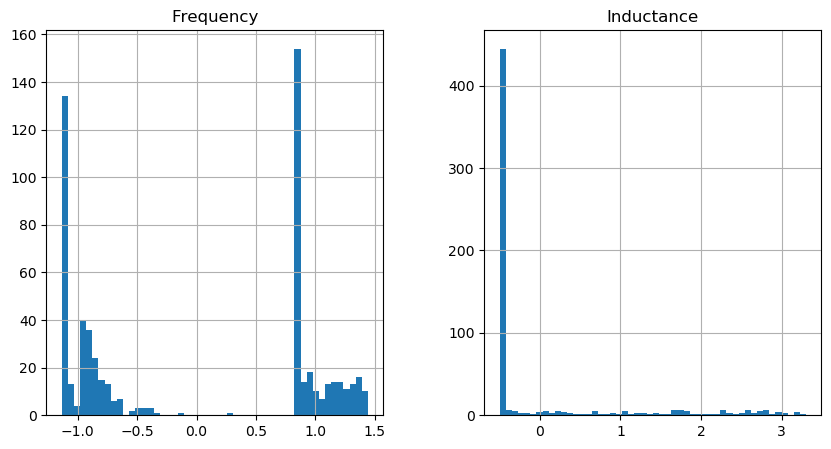

In [256]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

for train_index, test_index in split.split(df_generated, df_generated["Permeability"]):
    strat_train_set = df_generated.loc[train_index]
    strat_test_set = df_generated.loc[test_index]


df_trained = strat_train_set.drop("Permeability", axis=1)
df_test = strat_test_set.drop("Permeability", axis=1)

df_trained_labels = strat_train_set["Permeability"].copy() 
df_test_labels = strat_test_set["Permeability"].copy()



num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(df_trained)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

df_trained_prepared = full_pipeline.fit_transform(df_trained)

df_prepared = pd.DataFrame(df_trained_prepared, columns=df_trained.columns)

df_prepared.hist(bins=50, figsize=(10,5))


In [237]:
df_prepared.head()

,Frequency,Inductance
0,0.88,-0.51
1,1.03,-0.51
2,-1.13,1.22
3,-1.14,2.81
4,0.28,-0.51


# Lazy predict classifier
 

In [238]:
from lazypredict.Supervised import LazyClassifier

data = full_pipeline.fit_transform(df_generated.drop("Permeability", axis=1))

y = df_generated['Permeability'].replace({'Non permeable': 0, 'diamagnetique': 1, 'paramagnetique': 2, 'ferromagnetique': 3})
X = data    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 37.87it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.06
ExtraTreesClassifier,1.00,1.00,None,1.00,0.08
XGBClassifier,1.00,1.00,None,1.00,0.06
RandomForestClassifier,1.00,1.00,None,1.00,0.11
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.01
BaggingClassifier,1.00,1.00,None,1.00,0.02
KNeighborsClassifier,1.00,1.00,None,1.00,0.01
LGBMClassifier,1.00,1.00,None,1.00,0.08
ExtraTreeClassifier,1.00,1.00,None,1.00,0.01


In [239]:
#multiclass classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#import resample 



from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict



#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_test, y_test)
y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(y_pred, y_test) * 100, 2)
print("Accuracy_LR: ", acc_log)
print("Confusion Matrix_LR: \n", confusion_matrix(y_test, y_pred))
print("Classification Report_LR: \n", classification_report(y_test, y_pred))


randclass = RandomForestClassifier()
randclass.fit(X_test, y_test)
y_pred_rand = randclass.predict(X_test)
acc_rand = round(accuracy_score(y_pred_rand, y_test) * 100, 2)
print("Accuracy_RF: ", acc_rand)
print("Confusion Matrix_RF: \n", confusion_matrix(y_test, y_pred_rand))
print("Classification Report_RF: \n", classification_report(y_test, y_pred_rand))

Accuracy_LR:  93.25
Confusion Matrix_LR: 
 [[ 78   0   0   0]
 [ 16  84   0   0]
 [  0   0 107   0]
 [  0   0  11 104]]
Classification Report_LR: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        78
           1       1.00      0.84      0.91       100
           2       0.91      1.00      0.95       107
           3       1.00      0.90      0.95       115

    accuracy                           0.93       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.93      0.93       400

Accuracy_RF:  100.0
Confusion Matrix_RF: 
 [[ 78   0   0   0]
 [  0 100   0   0]
 [  0   0 107   0]
 [  0   0   0 115]]
Classification Report_RF: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       107
           3       1.00      1.00      1.00       11

X_test [[ 1.3280366  -0.51247968]
 [ 1.39237765 -0.51250501]
 [-0.64047853 -0.50156843]
 [-0.91660579 -0.46273471]
 [-1.10325319  0.24160233]
 [-0.1462948  -0.50994433]
 [-1.13907663  3.24322026]
 [ 1.09652936 -0.51236999]
 [ 0.8755858  -0.51222866]
 [ 1.22566083 -0.51243509]
 [-1.09087325  0.01926026]
 [-1.13725189  2.81300359]
 [ 0.8755858  -0.51222866]
 [ 0.8930499  -0.51224151]
 [-1.13828767  3.04752878]
 [-0.88475672 -0.47339495]
 [-1.09864523  0.14489875]
 [-0.88199159 -0.47415639]
 [ 0.90663942 -0.51225129]
 [-1.13525003  2.42085918]
 [ 1.30655698 -0.51247078]
 [ 1.0581156  -0.5123484 ]
 [-0.95624724 -0.44217568]
 [ 0.8755858  -0.51222866]
 [-0.79503736 -0.49014675]
 [ 0.8755858  -0.51222866]
 [ 1.30160942 -0.5124687 ]
 [ 1.15620782 -0.51240142]
 [-1.11102821  0.46089861]
 [ 0.8755858  -0.51222866]
 [-0.78865847 -0.49090819]
 [-0.68645627 -0.49928409]
 [-1.11399681  0.57054676]
 [-0.74202173 -0.49547686]
 [-0.55195821 -0.50461421]
 [ 0.8755858  -0.51222866]
 [-1.13740996  2.8472

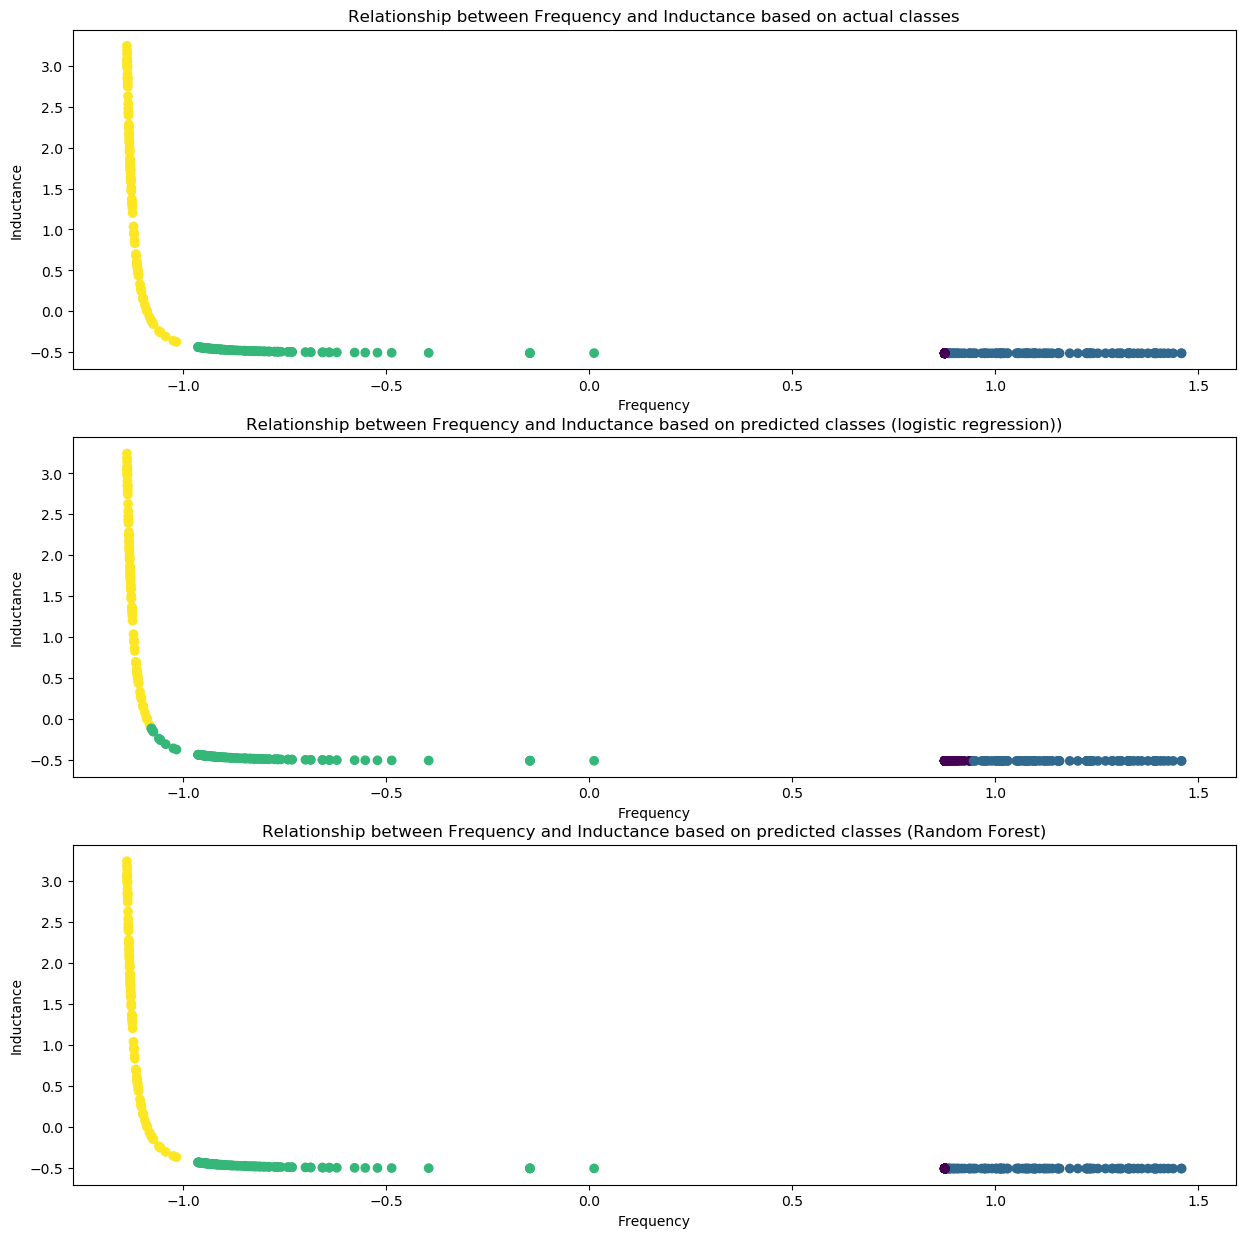

In [240]:
print("X_test", X_test)
print("y_pred",y_pred)


frequency = X_test[:, 0]
inductance = X_test[:, 1]


import matplotlib.pyplot as plt

# Assuming you have frequency, inductance, y_test, y_pred, and y_pred_rand defined as in your previous questions

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Plot the first scatter plot on the first column
axs[0].scatter(frequency, inductance, c=y_test, cmap='viridis')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Inductance')
axs[0].set_title('Relationship between Frequency and Inductance based on actual classes')

# Plot the second scatter plot on the second column
axs[1].scatter(frequency, inductance, c=y_pred, cmap='viridis')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Inductance')
axs[1].set_title('Relationship between Frequency and Inductance based on predicted classes (logistic regression))')

# Plot the third scatter plot on the third column
axs[2].scatter(frequency, inductance, c=y_pred_rand, cmap='viridis')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Inductance')
axs[2].set_title('Relationship between Frequency and Inductance based on predicted classes (Random Forest)')

# Show the plot
plt.show()

In [267]:
df_plot_xp = pd.DataFrame()

import os
import pandas as pd

for file in os.listdir("dataset"):
    if file.endswith(".csv"):
        file_path = os.path.join("dataset", file)
        df = pd.read_csv(file_path)
        data = full_pipeline.fit_transform(df.drop("Permeability", axis=1))
        y = df['Permeability'].replace({'Non permeable': 0, 'diamagnetique': 1, 'paramagnetique': 2, 'ferromagnetique': 3})
        X = data    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

        randclass = RandomForestClassifier()
        randclass.fit(X_test, y_test)
        y_pred_rand = randclass.predict(X_test)
        unique_classes, class_counts = np.unique(y_pred_rand, return_counts=True)
        # Obtenez les fréquences relatives de chaque classe
        class_percentages = class_counts / len(y_pred_rand) * 100
        frequency = X_test[:, 0]
        inductance = X_test[:, 1]
        
        df_plot_xp = df_plot_xp.append({
            "frequency": frequency,
            "inductance": inductance,
            "class_percentages": class_percentages,
            "unique_classes": unique_classes
        }, ignore_index=True)


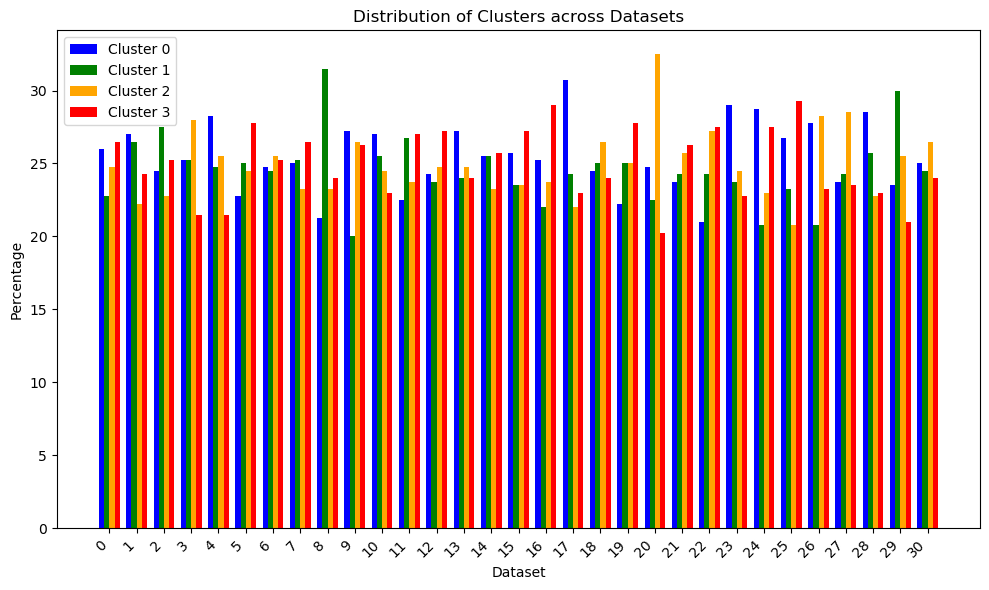

In [288]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the dataset names and cluster percentages for each dataset
dataset_names = df_plot_xp.index
cluster_percentages = df_plot_xp["class_percentages"]
num_datasets = len(dataset_names)
num_clusters = len(cluster_percentages[0])

# Define the cluster labels and colors
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']  # Adjust as per your cluster count
colors = ['blue', 'green', 'orange', 'red']  # Adjust as per your cluster count

# Set the width of each bar
bar_width = 0.19

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions of the bars on the x-axis
x_positions = np.arange(num_datasets)

# Plot the grouped bars for each cluster
for i in range(num_clusters):
    cluster_percentages_i = [cluster_percentages[j][i] for j in range(num_datasets)]
    ax.bar(x_positions + (i * bar_width), cluster_percentages_i, width=bar_width, color=colors[i])

# Set the labels and title
ax.set_xlabel('Dataset')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Clusters across Datasets')

# Set the x-axis tick positions and labels
ax.set_xticks(x_positions + (bar_width * (num_clusters - 1)) / 2)
ax.set_xticklabels(dataset_names, rotation=45, ha='right')

# Set the legend
ax.legend(cluster_labels)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


1.328036599178696 -0.5124796785373672 1
Classes: [0 1 2 3]
Fréquences relatives: [19.5  25.   26.75 28.75]


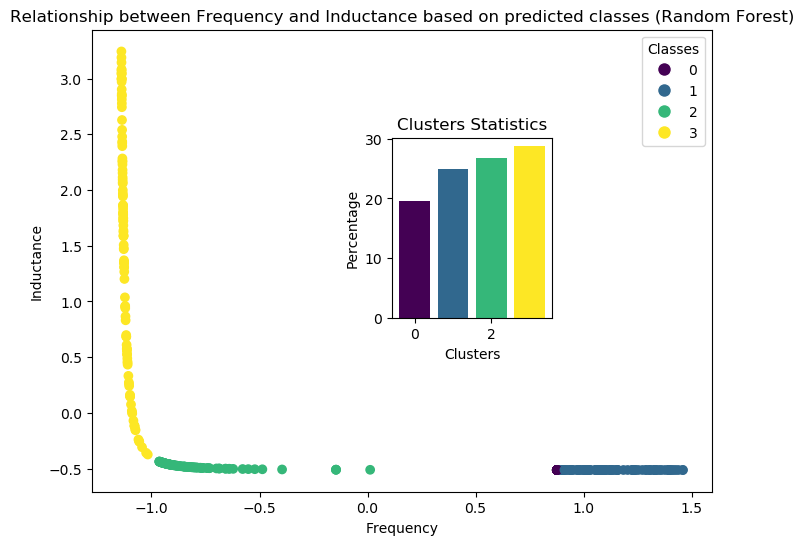

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Obtenez les prédictions de Random Forest
print(X_test[:, 0][0], X_test[:, 1][0], y_pred_rand[0])
# Calculez les statistiques des classes
unique_classes, class_counts = np.unique(y_pred_rand, return_counts=True)

# Obtenez les fréquences relatives de chaque classe
class_percentages = class_counts / len(y_pred_rand) * 100

print("Classes:", unique_classes)
print("Fréquences relatives:", class_percentages)

# Scatter plot
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
scatter = axs.scatter(frequency, inductance, c=y_pred_rand, cmap='viridis')
axs.set_xlabel('Frequency')
axs.set_ylabel('Inductance')
axs.set_title('Relationship between Frequency and Inductance based on predicted classes (Random Forest)')

# Bar plot des statistiques de classe
bar_axs = fig.add_axes([0.5, 0.4, 0.2, 0.3])  # Position du graphique à barres
bar_colors = [mcolors.to_hex(c) for c in scatter.cmap(scatter.norm(unique_classes))]  # Conversion en format hexadécimal
bar_axs.bar(unique_classes, class_percentages, color=bar_colors)
bar_axs.set_xlabel('Clusters')
bar_axs.set_ylabel('Percentage')
bar_axs.set_title('Clusters Statistics')

# Légende du scatter plot
legend_labels = np.unique(y_pred_rand)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) for c in scatter.cmap(scatter.norm(legend_labels))]
axs.legend(legend_handles, legend_labels, title='Classes')

plt.show()


# Lazy predict regressor

In [242]:
from lazypredict.Supervised import LazyRegressor

data = full_pipeline.fit_transform(df_generated)
y = df_generated["Permeability"].replace({"Non permeable": 0, "diamagnetique": 1, "paramagnetique": 2, "ferromagnetique": 3})
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)


 21%|██▏       | 9/42 [00:00<00:00, 53.61it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.008425712585449219}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.01895284652709961}
{'Model': 'BayesianRidge', 'R-Squared': 0.8200643499378732, 'Adjusted R-Squared': 0.8182375920692222, 'RMSE': 0.4494744147318113, 'Time taken': 0.0049664974212646484}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0051534175872802734}
{'Model': 'DummyRegressor', 'R-Squared': -0.02650241588920288, 'Adjusted R-Squared': -0.03692376021295107, 'RMSE': 1.07356008215656, 'Time taken': 0.004314899444580078}
{'Model': 'ElasticNet', 'R-Squared': 0.47088746626862765, 'Adjusted R-Squared': 0.465515765418563, 'RMSE': 0.7707621715290921, 'Time taken': 0.007285594940185547}
{'Model': 'ElasticNetCV', 'R-Squared': 0.8202148557814838, 'Adjusted R-Squared': 0.8183896258909404, 'RMSE': 0.449286395631

 48%|████▊     | 20/42 [00:00<00:00, 29.52it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992757944, 'Adjusted R-Squared': 0.9999999992684421, 'RMSE': 2.8515257201812125e-05, 'Time taken': 0.12192273139953613}
{'Model': 'HuberRegressor', 'R-Squared': 0.8153759740892459, 'Adjusted R-Squared': 0.8135016184962434, 'RMSE': 0.4552924781851188, 'Time taken': 0.013189315795898438}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9992874796820378, 'Adjusted R-Squared': 0.999280245973226, 'RMSE': 0.028284271247461905, 'Time taken': 0.006652355194091797}
{'Model': 'KernelRidge', 'R-Squared': -1.2857050217685901, 'Adjusted R-Squared': -1.3089101488931445, 'RMSE': 1.601977670199004, 'Time taken': 0.021516799926757812}
{'Model': 'Lars', 'R-Squared': 0.8199934716991398, 'Adjusted R-Squared': 0.818165994254461, 'RMSE': 0.44956293198282965, 'Time taken': 0.010763406753540039}
{'Model': 'LarsCV', 'R-Squared': 0.8199934716991398, 'Adjusted R-Squared': 0.818165994254461, 'RMSE': 0.44956293198282965, 'Time taken': 0.01943802833557

 69%|██████▉   | 29/42 [00:01<00:00, 13.14it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9206771145299194, 'Adjusted R-Squared': 0.9198718060479897, 'RMSE': 0.29843215767351505, 'Time taken': 0.9930858612060547}
{'Model': 'NuSVR', 'R-Squared': 0.9011048096974595, 'Adjusted R-Squared': 0.9001007976131697, 'RMSE': 0.3332222190850047, 'Time taken': 0.09225654602050781}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7738336418040728, 'Adjusted R-Squared': 0.7715375366447232, 'RMSE': 0.5039185775732348, 'Time taken': 0.010777711868286133}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8199934716991397, 'Adjusted R-Squared': 0.8181659942544609, 'RMSE': 0.44956293198282976, 'Time taken': 0.007903337478637695}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.3069283812455486, 'Adjusted R-Squared': -1.3303489739485492, 'RMSE': 1.6093978728869287, 'Time taken': 0.005140066146850586}
{'Model': 'PoissonRegressor', 'R-Squared': 0.744665123335181, 'Adjusted R-Squared': 0.7420728910847767, 'RMSE': 0.5354284416682982, 'Time t

 76%|███████▌  | 32/42 [00:12<00:09,  1.11it/s]

{'Model': 'QuantileRegressor', 'R-Squared': -0.3938678720090252, 'Adjusted R-Squared': -0.40801881487206093, 'RMSE': 1.2509996003176553, 'Time taken': 10.70304250717163}
{'Model': 'RANSACRegressor', 'R-Squared': 0.5645555596467524, 'Adjusted R-Squared': 0.5601348039071254, 'RMSE': 0.6992182288224597, 'Time taken': 0.06104874610900879}


 81%|████████  | 34/42 [00:12<00:06,  1.32it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999888668700319, 'Adjusted R-Squared': 0.9999887538433316, 'RMSE': 0.0035355339059327407, 'Time taken': 0.16088080406188965}
{'Model': 'Ridge', 'R-Squared': 0.8201133537810977, 'Adjusted R-Squared': 0.8182870934133931, 'RMSE': 0.44941320542283575, 'Time taken': 0.008544206619262695}
{'Model': 'RidgeCV', 'R-Squared': 0.820113353781284, 'Adjusted R-Squared': 0.8182870934135813, 'RMSE': 0.4494132054226031, 'Time taken': 0.011120080947875977}
{'Model': 'SGDRegressor', 'R-Squared': 0.819991818214636, 'Adjusted R-Squared': 0.8181643239833125, 'RMSE': 0.4495649967513732, 'Time taken': 0.010227203369140625}
{'Model': 'SVR', 'R-Squared': 0.9065629232827729, 'Adjusted R-Squared': 0.9056143235191462, 'RMSE': 0.32389630101497724, 'Time taken': 0.043437957763671875}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8199934716991399, 'Adjusted R-Squared': 0.8181659942544611, 'RMSE': 0.4495629319828295, 'Time taken': 0.012327909469604492}


 95%|█████████▌| 40/42 [00:12<00:00,  2.26it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7048382069785433, 'Adjusted R-Squared': 0.7018416405519294, 'RMSE': 0.5756737636540908, 'Time taken': 0.16130805015563965}


100%|██████████| 42/42 [00:17<00:00,  2.46it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999982657426, 'Adjusted R-Squared': 0.9999999982481359, 'RMSE': 4.4126872622553064e-05, 'Time taken': 4.039482116699219}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992757944, 'Adjusted R-Squared': 0.9999999992684421, 'RMSE': 2.8515257201812125e-05, 'Time taken': 0.05606198310852051}


In [243]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,1.00,1.00,0.00,0.01
ExtraTreeRegressor,1.00,1.00,0.00,0.01
BaggingRegressor,1.00,1.00,0.00,0.02
DecisionTreeRegressor,1.00,1.00,0.00,0.01
ExtraTreesRegressor,1.00,1.00,0.00,0.07
HistGradientBoostingRegressor,1.00,1.00,0.00,0.12
GradientBoostingRegressor,1.00,1.00,0.00,0.11
LGBMRegressor,1.00,1.00,0.00,0.06
XGBRegressor,1.00,1.00,0.00,4.04


In [244]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


data = full_pipeline.fit_transform(df_generated)

y = df_generated["Permeability"].replace({"Non permeable": 0, "diamagnetique": 1, "paramagnetique": 2, "ferromagnetique": 3})
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_test, y_test)

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0067823299831252706

# Optimisation of the model


In [245]:
#randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': np.random.randint(10, 100, 1).tolist(),
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None] + np.random.randint(1, 100, 9).tolist(),
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None] + np.random.randint(2, 50, 9).tolist(),
    'oob_score': [True, False],
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=1)
rnd_search.fit(X_test, y_test)

rnd_search.best_params_

        

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'oob_score': False,
 'n_estimators': 99,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 11,
 'criterion': 'absolute_error'}

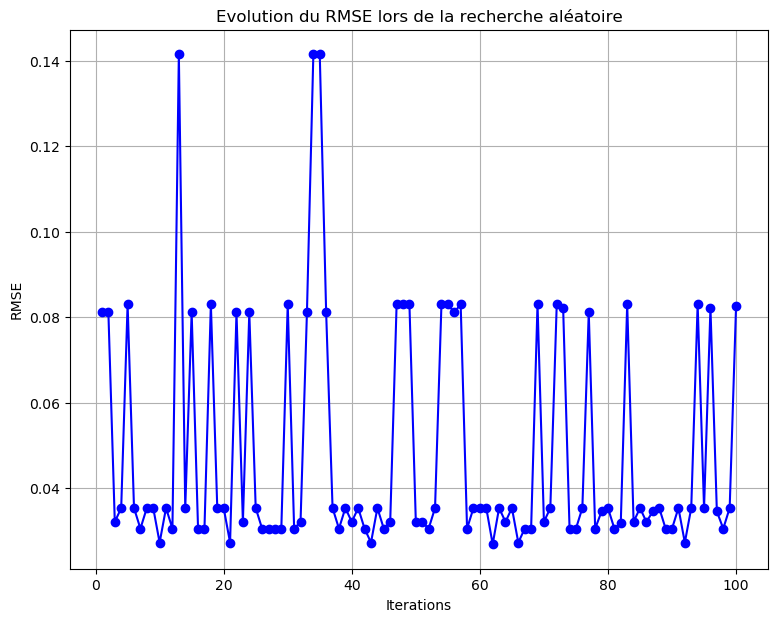

In [246]:
import matplotlib.pyplot as plt
import numpy as np

# Obtenez les scores négatifs de l'erreur quadratique moyenne pour chaque combinaison de paramètres
neg_scores = rnd_search.cv_results_['mean_test_score']
rmse_scores = np.sqrt(-neg_scores)

# Obtenez le nombre d'itérations (ou le nombre de combinaisons de paramètres testées)
n_iterations = len(rmse_scores)

# Créez une liste d'itérations
iterations = list(range(1, n_iterations + 1))

# Tracez le graphique de l'évolution du RMSE
plt.plot(iterations, rmse_scores, 'bo-')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Evolution du RMSE lors de la recherche aléatoire')
plt.grid(True)
plt.show()


In [247]:
final_model = RandomForestRegressor(**rnd_search.best_params_)
final_model.fit(X_test, y_test)

y_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.007856742013183857

ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 1, 'y' with size 1.

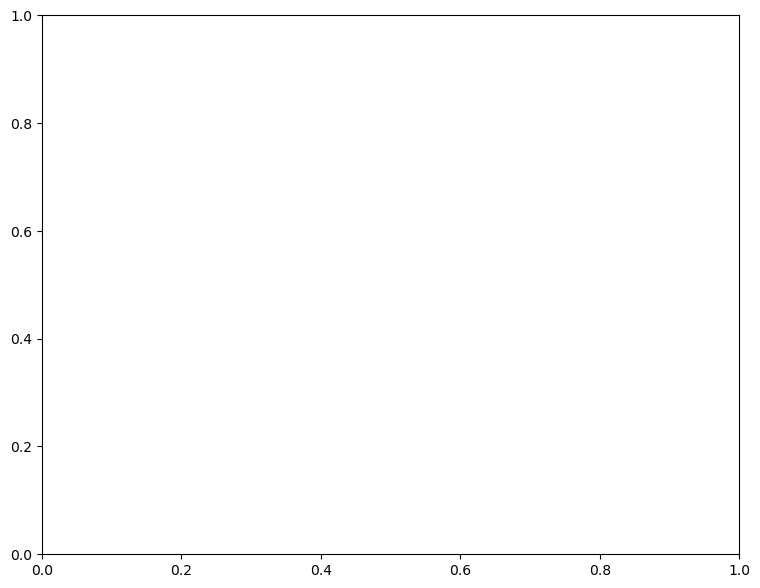

In [248]:
import matplotlib.pyplot as plt

# Set the frequency and inductance values for prediction
frequency = 100  # Replace with your desired frequency value
inductance = 200  # Replace with your desired inductance value

# Create a DataFrame with the frequency and inductance values
data = pd.DataFrame({'Frequency': [frequency], 'Inductance': [inductance]})

# Predict the permeability using the trained Random Forest Regressor
predicted_permeability = final_model.predict(data)

# Plot the predicted permeability
plt.scatter(frequency, inductance, c=predicted_permeability, cmap='viridis')
plt.colorbar(label='Predicted Permeability')
plt.xlabel('Frequency')
plt.ylabel('Inductance')
plt.title('Predicted Permeability based on Frequency and Inductance')
plt.show()


# Clustering

For the next part of the analyse and devlopment, we want to know the impact of permeability inside the dataset, and also, the 4 mains cluster/group of data inside the range of permeability.
In fact, after get Frequency and inductance, on thing is sure, the permeability is the most important parameter to predict the metal of the signal. So, we can use the permeability as a target to cluster the data.
By define above the range of each categorie of permeability, we can cluster the data in 4 groups, and then, we can see progress of frequency and inductance in fonction of permeability.

Below, there is a brief recap of number of records in each group of permeability.


# 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from matplotlib.widgets import Cursor
from sklearn.svm import SVR


#variables defined
tab_induc_predic = []
tab_perme_predic = []
tab_frequency_plot = []

def kmeans_cluster(df):
    kmeans = KMeans(n_clusters=4, random_state=0).fit(df[['Frequency', 'Inductance','Permeability']])
    labels = kmeans.fit_predict(df[['Frequency', 'Inductance','Permeability']])
    #named cluster
    df['Cluster'] = labels
    df['Cluster'] = df['Cluster'].map({0: 0, 1: 1, 2: 2, 3: 3})
    return kmeans, labels

kmeans, labels = kmeans_cluster(df)


print("Number of Non-permeable: ", len(df[df['Cluster'] == 0]))
print("Number of Diamagnetique: ", len(df[df['Cluster'] == 1]))
print("Number of Paramagnetique: ", len(df[df['Cluster'] == 2]))
print("Number of Ferromagnetique: ", len(df[df['Cluster'] == 3]))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(df['Frequency'], df['Inductance'], c=df['Permeability'], cmap='rainbow')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Inductance')
ax1.set_title('Frequency vs Inductance with Permeability color')
fig.colorbar(ax1.scatter(df['Frequency'], df['Inductance'], c=df['Permeability'], cmap='rainbow'), ax=ax1)

ax2.scatter(df['Frequency'], df['Inductance'], c=np.squeeze(labels), cmap='rainbow')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Inductance')
ax2.set_title('Frequency vs Inductance with Kmeans clustering of permeability')


fig.suptitle('Clustering comprehension', fontsize=16)
fig.subplots_adjust(top=0.85)

plt.show()





KeyError: "['Permeability'] not in index"

# Results of Clustering

As you can see above, there is 2 graphs representing of Frequency and Inductance but with one parameter more : Permeability. The permeability is the target of the clustering algorithm, and the frequency and inductance are the features of the clustering algorithm. Concretely, we can see that permeability decrease when the frequency increase, and inductance decrease. That's an important result because the cluster generated will be accurate if there is a correlation between the permeability and the frequency and inductance.

On the second graph, we can see the 4 clusters representing the 4 mains categories of permeability. Thanks to that, we can add one more colomn in th dataset named "Cluster", representing by 0,1,2 and 3 (Non-permeable, Ferromagnetic, Paramagnetic and Diamagnetic). It will be useful for the next step of the project, when we would like to predict the main categorie in fonction of frequency and inductance.



# Prediction algorithms in Metal detector simulation case with huge dataset

As we can made above, We used 3 prediction algorithms like Linear regression, polynomial regression and Random forest. The result was good mais not all representativ of the situation. That's why, with a bigger dataset, the result of the 3 algorithms will be more representative and less false.

To compare each algorithm, the idea is to put as an input one frequency value. By divided in 3 differents fonctions, It will be allow to us to get a value of inductance.
This value of inductance will be represented in the graph by a red point.
After get inductance, a simple calcul will allow to us to et permeability of the specific frequency.

So, 3 paremeters will allow to compare the accuracy of the 3 algorithms : 
- Mean squared error : Mean squared error (MSE) is a measure of the difference between the observed values of a dependent variable and the predicted values of the dependent variable based on a statistical model.
- Variance score : The variance score is a measure of the accuracy of a regression model. It is calculated as the ratio of the explained variance to the total variance, and it ranges from 0 to 1. A variance score of 1 indicates that the model perfectly explains the variance in the data, while a variance score of 0 indicates that the model does not explain any of the variance in the data.
- Permeability value.

prediction algorithms like Linear regression, polynomial regression and Random forest. The result was good mais not all representativ of the situation. That's why, with a bigger dataset, the result of the 3 algorithms will be more representative and less false.

To compare each algorithm, the idea is to put as an input one frequency value. By divided in 3 differents fonctions, It will be allow to us to get a value of inductance.
This value of inductance will be represented in the graph by a red point.
After get inductance, a simple calcul will allow to us to et permeability of the specific frequency.

So, 3 paremeters will allow to compare the accuracy of the 3 algorithms : 
- Mean squared error : Mean squared error (MSE) is a measure of the difference between the observed values of a dependent variable and the predicted values of the dependent variable based on a statistical model.
- Variance score : The variance score is a measure of the accuracy of a regression model. It is calculated as the ratio of the explained variance to the total variance, and it ranges from 0 to 1. A variance score of 1 indicates that the model perfectly explains the variance in the data, while a variance score of 0 indicates that the model does not explain any of the variance in the data.
- Permeability value.



Mean squared error of polynomial regression: 16.08
Variance score of polynomial regression: 0.48


Mean squared error of Linear regression: 21.57
Variance score of Linear regression: 0.31


Mean squared error of random forest: 0.00
Variance score of random forest: 1.00


Mean squared error of SVR: 0.01
Variance score of SVR: 1.00


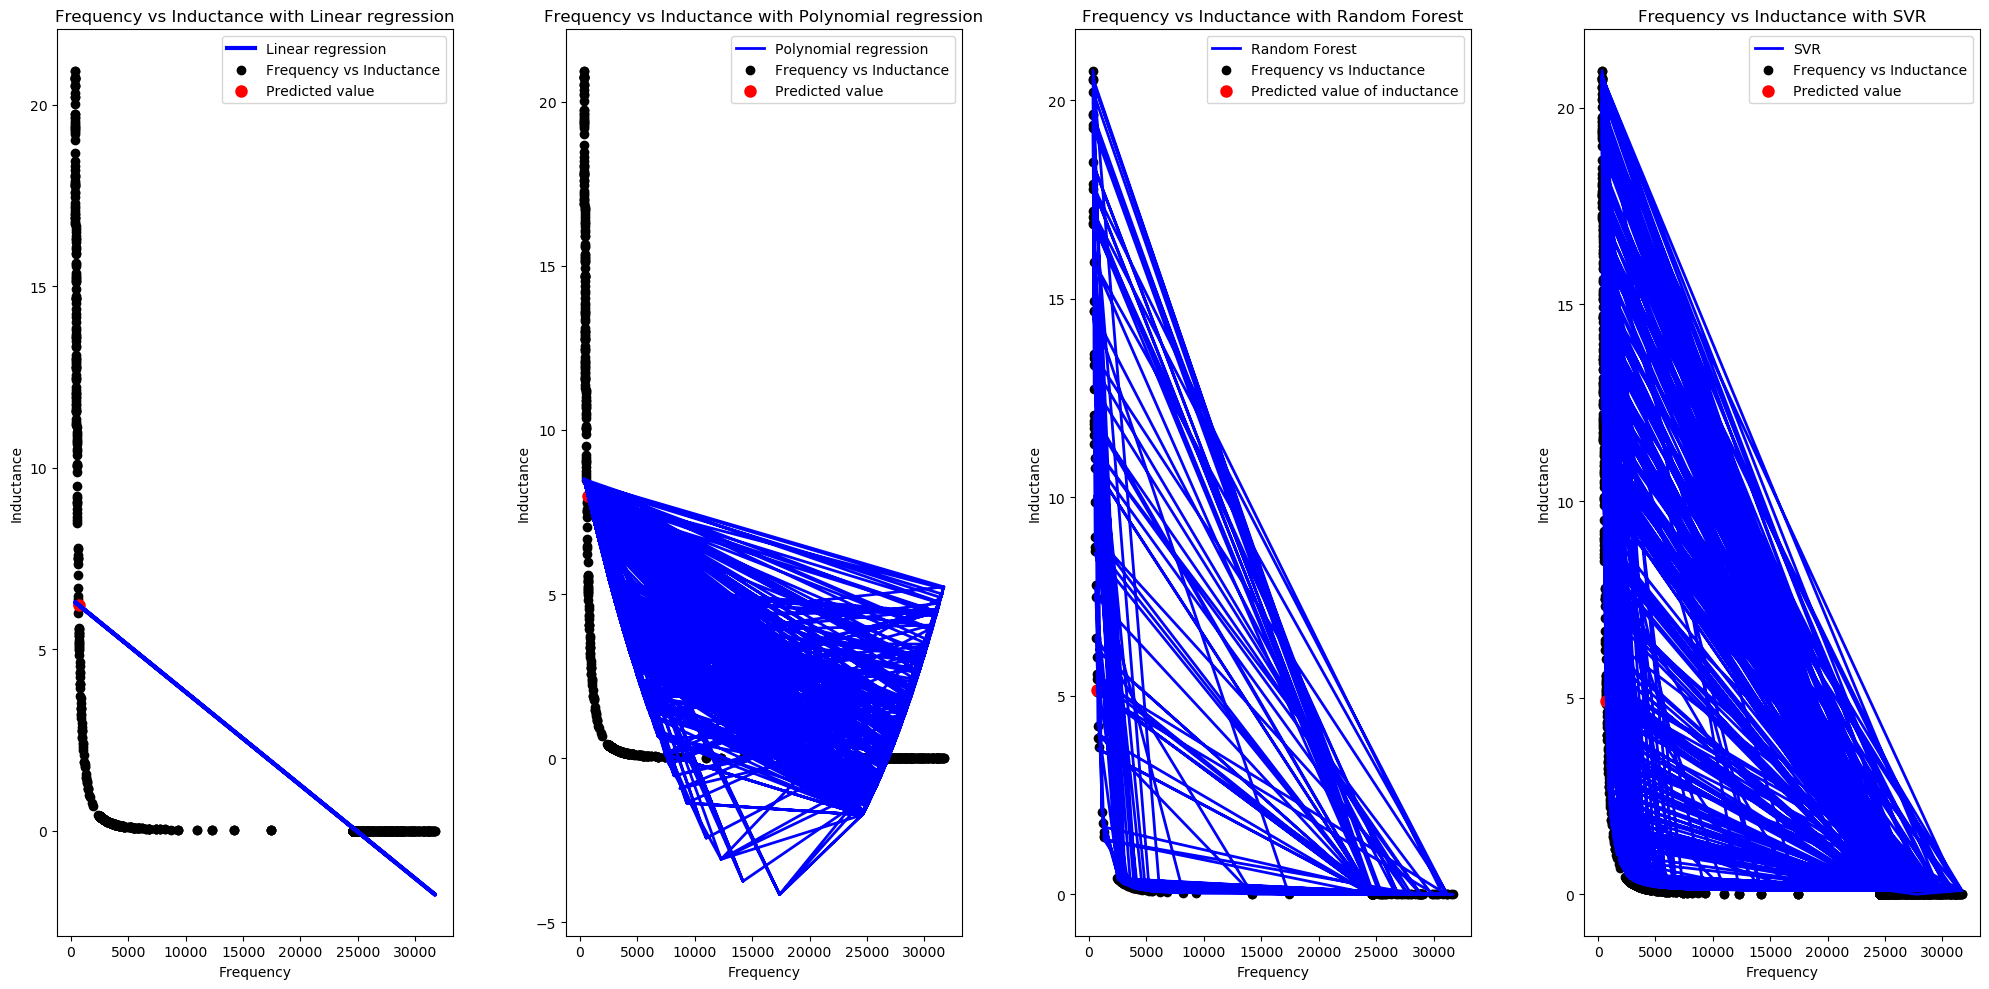

Permeability by using linear regression:  [1482.68302728]
Permeability by using polynomial regression:  [1906.3381025]
Permeability by using random forest:  [1227.85]
Permeability by using SVR:  [1174.94082964]


In [ ]:
df =  df_first

def predict_inductance_by_frequency_with_linear_reg(frequency,df):
    
    model = LinearRegression()
    model.fit(df[['Frequency']], df['Inductance'])
    inductance = model.predict([[frequency]])
    # mean squared error
    print("\n")

    print("Mean squared error of Linear regression: %.2f"
            % mean_squared_error(df['Inductance'], model.predict(df[['Frequency']])))
    # Explained variance score: 1 is perfect prediction 

    print('Variance score of Linear regression: %.2f' % r2_score(df['Inductance'], model.predict(df[['Frequency']])))
    return inductance, model,frequency

def predict_inductance_by_frequency_with_svr(frequency,df):
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    model.fit(df[['Frequency']], df['Inductance'])
    inductance = model.predict([[frequency]])
    # mean squared error
    print("\n")

    print("Mean squared error of SVR: %.2f"
            % mean_squared_error(df['Inductance'], model.predict(df[['Frequency']])))
    # Explained variance score: 1 is perfect prediction 

    print('Variance score of SVR: %.2f' % r2_score(df['Inductance'], model.predict(df[['Frequency']])))

    return inductance, model, frequency


def predict_inductance_by_frequency_with_polynomial_reg(frequency,df):

    model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    model.fit(df[['Frequency']], df['Inductance'])
    inductance = model.predict([[frequency]])
    # mean squared error
    print("\n")

    print("Mean squared error of polynomial regression: %.2f"
            % mean_squared_error(df['Inductance'], model.predict(df[['Frequency']])))
    # Explained variance score: 1 is perfect prediction 

    print('Variance score of polynomial regression: %.2f' % r2_score(df['Inductance'], model.predict(df[['Frequency']])))

    return inductance, model, frequency


def predict_induct_by_using_random_forest(frequency,df):
    #split data
    X = df[['Frequency']]
    y = df['Inductance']
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
    #train model
    regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    #predict inductance
    inductance = regressor.predict([[frequency]])
 
    #mean squared error
    print("\n")
    print("Mean squared error of random forest: %.2f"
            % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction 
    print('Variance score of random forest: %.2f' % r2_score(y_test, y_pred))

    X_test = np.array(X_test).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)

    return inductance, X_test, y_test, y_pred, frequency


inductance_poly, model_poly, frequency_poly = predict_inductance_by_frequency_with_polynomial_reg(702.626092,df)
inductance_lin, model_lin,frequency_lin = predict_inductance_by_frequency_with_linear_reg(702.626092,df)
inductance_RF, X_test, y_test, y_pred, frequency_RF = predict_induct_by_using_random_forest(702.626092,df)
inductance_svr, model_svr, frequency_svr = predict_inductance_by_frequency_with_svr(702.626092,df)



fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))


#linear regression
ax1.scatter(df['Frequency'], df['Inductance'],  color='black')
ax1.plot(df['Frequency'], model_lin.predict(df[['Frequency']]), color='blue', linewidth=3)
ax1.scatter(frequency_lin, inductance_lin, color='red', linewidth=3, label='Predicted value')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Inductance')
ax1.set_title('Frequency vs Inductance with Linear regression')
ax1.legend(['Linear regression', 'Frequency vs Inductance', 'Predicted value'])


#polynomial regression
ax2.scatter(df['Frequency'], df['Inductance'],  color='black')
ax2.plot(df['Frequency'], model_poly.predict(df[['Frequency']]), color='blue', linewidth=2)
ax2.scatter(frequency_poly, inductance_poly, color='red', linewidth=3, label='Predicted value')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Inductance')
ax2.set_title('Frequency vs Inductance with Polynomial regression')
ax2.legend(['Polynomial regression', 'Frequency vs Inductance', 'Predicted value'])


#random forest
ax3.scatter(X_test, y_test,  color='black',linewidths=1)
ax3.plot(X_test, y_pred, color='blue', linewidth=2)
ax3.scatter(frequency_RF, inductance_RF, color='red', linewidth=3, label='Predicted value of inductance')
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Inductance')
ax3.set_title('Frequency vs Inductance with Random Forest')
ax3.legend(['Random Forest', 'Frequency vs Inductance', 'Predicted value of inductance'])


ax4.scatter(df['Frequency'], df['Inductance'],  color='black')
ax4.plot(df['Frequency'], model_svr.predict(df[['Frequency']]), color='blue', linewidth=2)
ax4.scatter(frequency_svr, inductance_svr, color='red', linewidth=3, label='Predicted value')
ax4.set_xlabel('Frequency')
ax4.set_ylabel('Inductance')
ax4.set_title('Frequency vs Inductance with SVR')
ax4.legend(['SVR', 'Frequency vs Inductance', 'Predicted value'])


fig.tight_layout()

plt.show()


permeability_linear_regression = calculate_permeability_by_inductance(inductance_lin)
permeability_polynomial_regression = calculate_permeability_by_inductance(inductance_poly)
permeability_random_forest = calculate_permeability_by_inductance(inductance_RF)
permeability_svr = calculate_permeability_by_inductance(inductance_svr)



print("Permeability by using linear regression: ", permeability_linear_regression)
print("Permeability by using polynomial regression: ", permeability_polynomial_regression)
print("Permeability by using random forest: ", permeability_random_forest)
print("Permeability by using SVR: ", permeability_svr)


# Results of prediction algorithms

With a bigger dataset, We can see lot of difference between each algorithm. Firstly, Linear regression is not really accurate. In fact, we can see that the mean squared error is very high, and the variance score is very low. So, the prediction is not really good.

The second algorithm is the polynomial regression and his mean squared error is a little bit lower than linear regression, and accuracy totally better (0.71 compared to 0.33), This algorithm is more accurate, but as we can on the figure, the prediction don't fit really with the real graph of the data, We could do better.


Finally, the two last algorithms are **Random Forest** and **SVR algorithm** (Support Vector Regression). The mean squared error is the lowest of the 3 algorithms, and the **variance score is the highest**. So, the prediction is the **most accurate**. The prediction fit really with the real graph of the data. Between the two algorithms, their results are **really close and also their accuracy**. But, in comparaison between results of permeability and the real data inside the dataset, **The random forest algorithm is more nearly of the real data, and so, the most accurate.**  



# Clustering and Permeability categories prediction

By using the Kmeans cluster generated above, and the best prediction algorithm in our case, It's now possible to predict the permeability category in fonction of frequency thaks to the Cluster.

Random forest will allow to us to predict the num of the cluster related to the frequency. In fact, the correaltion between one frequency, inductance, permeability and so the cluster has been set lately. It's enough only to do the same thing above with the prediction induction, but now with the cluster.

In [ ]:
print(df.head())

      Frequency Inductance Permeability  Cluster
0  55280.602547   0.000829     0.629878        3
1    696.841598   5.216415       3964.0        2
2   1154.562092   1.900228       1444.0        2
3   5134.988326   0.096064         73.0        1
4  56500.410081   0.000793     0.602974        3




Mean squared error of random forest: 0.00
Variance score of random forest: 1.00
Cluster by using random forest: Non-permeable  Cluster nb : [0.]


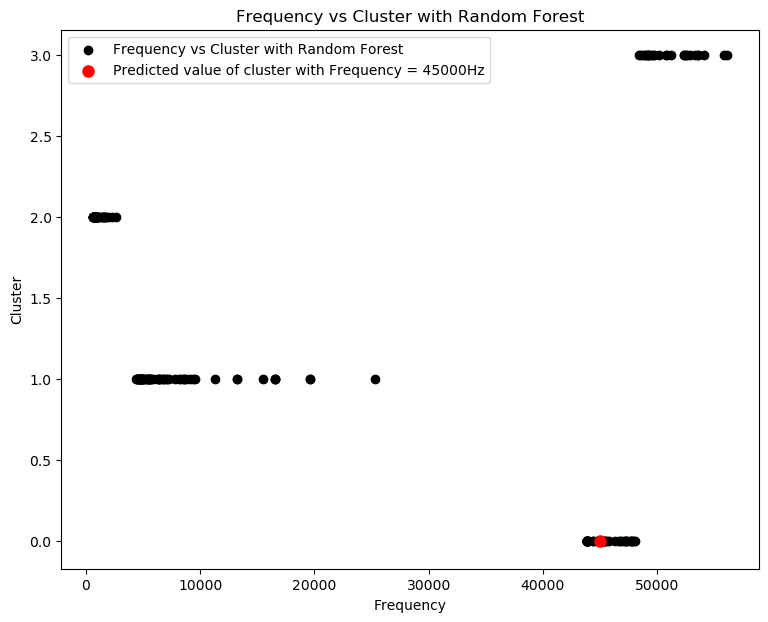

In [ ]:

def predict_induct_by_using_random_forest(frequency,df):
    #split data
    X = df[['Frequency']]
    y = df['Cluster']
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
    #train model
    regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    #predict inductance
    cluster = regressor.predict([[frequency]])
 
    #mean squared error
    print("\n")
    print("Mean squared error of random forest: %.2f"
            % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction 
    print('Variance score of random forest: %.2f' % r2_score(y_test, y_pred))

    X_test = np.array(X_test).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)

    return cluster, X_test, y_test, y_pred, frequency

frequency = 45000

cluster_RF, X_test, y_test, y_pred, frequency_RF = predict_induct_by_using_random_forest(frequency,df)

#print cluster 
if cluster_RF == 0:
    print("Cluster by using random forest: Non-permeable ", "Cluster nb : " + str(cluster_RF))
elif cluster_RF == 1:
    print("Cluster by using random forest: Diamagnetique ", "Cluster nb : " + str(cluster_RF))
elif cluster_RF == 2:
    print("Cluster by using random forest: Paramagnetique ", "Cluster nb : " + str(cluster_RF))
elif cluster_RF == 3:
    print("Cluster by using random forest: Ferromagnetique ", "Cluster nb : " + str(cluster_RF))



#plot the result
plt.scatter(X_test, y_test,  color='black',linewidths=1)
#put value of frequency inside the label of the point

plt.scatter(frequency_RF, cluster_RF, color='red', linewidth=3, label='Predicted value of cluster' + str(frequency))
plt.xlabel('Frequency')
plt.ylabel('Cluster')
plt.title('Frequency vs Cluster with Random Forest')
plt.legend(['Frequency vs Cluster with Random Forest', 'Predicted value of cluster with Frequency = '+ str(frequency) + 'Hz' ])
plt.show()


# Result of Cluster prediction

As you can see above, the prediction is again really accurate, and we can fin also all of the different cluster in fonction of the frequency. In red Point, we can see the value of the cluster for on frequency value set in the code above.
This result allow to us that predict with one frequency value, the specific permeability category of the metal.

# Conclusion

In this project, we have seen how to generate a dataset with a metal detector simulation, and how to use this dataset to predict the permeability category of the metal in fonction of frequency. We have seen also how to cluster the data in 4 groups, and how to predict the cluster in fonction of frequency.